# 1.패키지 가져옴

In [ ]:
# 한글 불러옴
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,030 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123576 files and dire

In [ ]:
# 런타임 다시 시작

# 데이터 분석과 관련된 필수 패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 분석 및 모델링을 위한 패키지 import

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# Google Colab에서 드라이브 마운트
from google.colab import drive

# 기타 유용한 패키지 import
import os
import datetime
import time

# 나눔고딕 폰트 설정
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family='NanumGothic')

In [ ]:
# 각 데이터프레임의 열 이름과 첫 번째 행의 값을 출력하는 함수
def print_column_names_and_first_row(dfs):
    for i, df in enumerate(dfs, 1):
        print(f"DataFrame {i}:")
        print("Columns:", df.columns.tolist())
        print("First Row:", df.iloc[0].tolist())
        print("Shape:",df.shape)
        print()

# dfs 지정
dfs=[df_subway,df_bus]

# 함수 호출
print_column_names_and_first_row(dfs)

NameError: name 'df_subway' is not defined

# 2.데이터 가져오기 및 확인 (df_)

In [ ]:
# 동별 전처리 필요
drive.mount('/content/drive')
df0 = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/최종병합데이터_소현.csv')

# 구별
# 유동인구
df1 = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/구별_유동인구.csv')
# 종사자, 폐기물 등
df2 = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/종사자수등.csv')
# 요일 등 사고
df3 = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/조건별사고비율.csv')

Mounted at /content/drive


###df0 동별을 구별로 다시 병합 및 전처리

In [ ]:
df0.columns

Index(['Unnamed: 0', '행정동명', '시군구명', '행정동명.1', '행정동코드', 'CCTV개수', '가로등개수',
       '버스정류소개수', '음식점개수', '주점개수', '주차장개수', '지하철역개수', '자동차소유대수', '22년 음주단속수',
       '사고건수', '음주운전_y'],
      dtype='object')

In [ ]:
df0.head()

,Unnamed: 0,행정동명,시군구명,행정동명.1,행정동코드,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,주차장개수,지하철역개수,자동차소유대수,22년 음주단속수,사고건수,음주운전_y
0,0,강남구 개포1동,강남구,개포1동,1168066000,57.0,0.0,15.0,6.0,0.0,30.0,0.0,3875.0,1998,0.0,1998.0
1,1,강남구 개포2동,강남구,개포2동,1168067000,231.0,0.0,34.0,94.0,8.0,154.0,3.0,10266.0,1998,3.0,4998.0
2,2,강남구 개포3동,강남구,개포3동,1168067500,108.0,102.0,11.0,43.0,1.0,29.0,1.0,6205.0,1998,0.0,1998.0
3,3,강남구 개포4동,강남구,개포4동,1168069000,381.0,0.0,28.0,141.0,19.0,1026.0,0.0,8552.0,1998,0.0,1998.0
4,4,강남구 논현1동,강남구,논현1동,1168052100,478.0,0.0,17.0,548.0,106.0,2136.0,2.0,10388.0,1998,15.0,16998.0


In [ ]:
df0[df0['행정동명.1']=="신사동"]
# 주차장 1178
# 지하철역 2
# 자동차 소유 7748

,Unnamed: 0,행정동명,시군구명,행정동명.1,행정동코드,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,주차장개수,지하철역개수,자동차소유대수,22년 음주단속수,사고건수,음주운전_y
15,15,강남구 신사동,강남구,신사동,1168051000,314.0,304.0,16.0,576.0,99.0,0.0,0.0,0.0,1998,4.0,5998.0
87,87,관악구 신사동,관악구,신사동,1162068500,228.0,2.0,17.0,147.0,41.0,2055.0,0.0,7748.0,703,0.0,703.0
88,88,관악구 신사동,관악구,신사동,1162068500,228.0,2.0,17.0,147.0,41.0,2055.0,0.0,5117.0,703,0.0,703.0


In [ ]:
df0.iloc[15,10] = 1178
df0.iloc[15,11] = 2
df0.iloc[15,12] =7748
df0.drop(87, inplace=True)
df0[df0['행정동명.1']=="신사동"]

,Unnamed: 0,행정동명,시군구명,행정동명.1,행정동코드,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,주차장개수,지하철역개수,자동차소유대수,22년 음주단속수,사고건수,음주운전_y
15,15,강남구 신사동,강남구,신사동,1168051000,314.0,304.0,16.0,576.0,99.0,1178.0,2.0,7748.0,1998,4.0,5998.0
88,88,관악구 신사동,관악구,신사동,1162068500,228.0,2.0,17.0,147.0,41.0,2055.0,0.0,5117.0,703,0.0,703.0


In [ ]:
df0['음식점및주점개수'] = df0['음식점개수'] + df0['주점개수']

In [ ]:
# 시군구명을 인덱스로 설정
df0.set_index('시군구명', inplace=True)

In [ ]:
# 시군구별 총합 구하기
#'CCTV개수', '가로등개수', '버스정류소개수', '음식점개수', '주점개수', '주차장개수', '지하철역개수', '사고건수',
df_s = df0.groupby('시군구명')[['CCTV개수', '가로등개수', '버스정류소개수', '음식점개수', '주점개수', '음식점및주점개수','주차장개수', '지하철역개수','자동차소유대수', '사고건수','22년 음주단속수']].mean().reset_index()
df_s.set_index('시군구명', inplace=True)
# 새로운 데이터프레임에 총합 및 평균 열 추가
# df00 = df_s.copy()
#df00 = df00.join(df_s, on='시군구명')

In [ ]:
df_s.head()

,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,음식점및주점개수,주차장개수,지하철역개수,자동차소유대수,사고건수,22년 음주단속수
시군구명,,,,,,,,,,,
강남구,306.772727,82.000000,25.409091,350.318182,55.909091,406.227273,935.409091,1.227273,11134.590909,7.409091,1998.0
강동구,72.400000,47.350000,22.050000,156.700000,32.700000,189.400000,806.050000,0.600000,7594.700000,1.000000,524.0
강북구,106.307692,0.000000,32.076923,177.153846,46.846154,224.000000,896.153846,0.846154,5778.230769,0.461538,545.0
강서구,113.800000,67.500000,31.200000,207.400000,45.600000,253.000000,969.350000,0.800000,10313.050000,1.400000,893.0
관악구,220.000000,3.047619,23.190476,161.190476,43.380952,204.571429,1005.238095,0.238095,5625.523810,0.809524,703.0


In [ ]:
df1.columns

Index(['자치구_명칭', '버스_승객_수', '지하철_승객_수', '버스승객수_scaled', '지하철승객수_scaled',
       '총승객수'],
      dtype='object')

In [ ]:
df2.columns

Index(['소음', '종사자수', '폐기물량'], dtype='object')

In [ ]:
df3.columns

Index(['남자', '여자', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월',
       '9월', '10월', '11월', '12월', '10대', '20대', '30대', '40대', '50대', '60대',
       '70대', '80대 이상', 'Afternoon', 'Early Morning', 'Evening', 'Late Night',
       'Morning', 'Night', '평균알콜농도', '총적발횟수'],
      dtype='object')

In [ ]:
# 인덱스 설정
df1.set_index('자치구_명칭', inplace=True)
df2.set_index('자치구', inplace=True)
df3.set_index('자치구', inplace=True)

In [ ]:
# 최종 구별 병합
df00 = pd.merge(df_s, df1, left_index=True, right_index=True, how='inner')
df00 = pd.merge(df00, df2, left_index=True, right_index=True, how='inner')
df00 = pd.merge(df00, df3, left_index=True, right_index=True, how='inner')

In [ ]:
df00.columns

Index(['CCTV개수', '가로등개수', '버스정류소개수', '음식점개수', '주점개수', '음식점및주점개수', '주차장개수',
       '지하철역개수', '자동차소유대수', '사고건수', '22년 음주단속수', '버스_승객_수', '지하철_승객_수',
       '버스승객수_scaled', '지하철승객수_scaled', '총승객수', '소음', '종사자수', '폐기물량', '남자',
       '여자', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월',
       '10월', '11월', '12월', '10대', '20대', '30대', '40대', '50대', '60대', '70대',
       '80대 이상', 'Afternoon', 'Early Morning', 'Evening', 'Late Night',
       'Morning', 'Night', '평균알콜농도', '총적발횟수'],
      dtype='object')

### 저장

In [ ]:
df00.to_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/분석할구별데이터.csv')
df00.head()

,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,음식점및주점개수,주차장개수,지하철역개수,자동차소유대수,사고건수,22년 음주단속수,버스_승객_수,지하철_승객_수,버스승객수_scaled,지하철승객수_scaled,총승객수
시군구명,,,,,,,,,,,,,,,,
강남구,306.772727,82.000000,25.409091,350.318182,55.909091,406.227273,935.409091,1.227273,11134.590909,7.409091,1998.0,102254991.0,156156645.0,1.000000,1.000000,1.000000
강동구,72.400000,47.350000,22.050000,156.700000,32.700000,189.400000,806.050000,0.600000,7594.700000,1.000000,524.0,28896885.0,44532905.0,0.000000,0.178010,0.089005
강북구,106.307692,0.000000,32.076923,177.153846,46.846154,224.000000,896.153846,0.846154,5778.230769,0.461538,545.0,58019122.0,30349973.0,0.396987,0.073567,0.235277
강서구,113.800000,67.500000,31.200000,207.400000,45.600000,253.000000,969.350000,0.800000,10313.050000,1.400000,893.0,55867325.0,69240377.0,0.367655,0.359954,0.363804
관악구,220.000000,3.047619,23.190476,161.190476,43.380952,204.571429,1005.238095,0.238095,5625.523810,0.809524,703.0,90091326.0,84730237.0,0.834188,0.474020,0.654104


In [ ]:
df00 = pd.merge(df00, df2, left_index=True, right_index=True, how='inner')
df00 = pd.merge(df00, df3, left_index=True, right_index=True, how='inner')

# 분석

In [ ]:
df00.columns

Index(['CCTV개수', '가로등개수', '버스정류소개수', '음식점개수', '주점개수', '음식점및주점개수', '주차장개수',
       '지하철역개수', '자동차소유대수', '사고건수', '22년 음주단속수', '버스_승객_수', '지하철_승객_수',
       '버스승객수_scaled', '지하철승객수_scaled', '총승객수', '소음', '종사자수', '폐기물량', '남자',
       '여자', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월',
       '10월', '11월', '12월', '10대', '20대', '30대', '40대', '50대', '60대', '70대',
       '80대 이상', 'Afternoon', 'Early Morning', 'Evening', 'Late Night',
       'Morning', 'Night', '평균알콜농도', '총적발횟수'],
      dtype='object')

In [ ]:
# 독립x,종속y 변수 컬럼 설정
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#'버스승객수_scaled',    '지하철승객수_scaled',

xcol=['CCTV개수', '가로등개수', '버스정류소개수', '음식점개수', '주점개수', '주차장개수', '지하철역개수',
        '자동차소유대수', '버스_승객_수', '지하철_승객_수', '총승객수', '소음', '종사자수', '폐기물량','평균알콜농도']

ycol=['남자', '여자',
      'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
        '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대 이상',
       'Afternoon', 'Early Morning', 'Evening', 'Late Night', 'Morning', 'Night',
      '22년 음주단속수','사고건수']

#        '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월',

In [ ]:
# ycol 표준화 필요
# Min-Max 표준화 함수
def min_max_scaling(df, columns):
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

# ycol Min-Max 표준화
df00 = min_max_scaling(df00, ycol)

In [ ]:
# 기본 통계 분석
def basic_statistics(df, columns):
    stats = df[columns].describe()
    return stats

# 상관관계 분석
def correlation_analysis(df, x_columns, y_columns):
    correlation_matrix = df[x_columns + y_columns].corr()
    return correlation_matrix

# 데이터 시각화
def data_visualization(df, x_columns, y_columns):
    # 각 독립변수와 종속변수 간의 산점도
    for x in x_columns:
        for y in y_columns:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=df, x=x, y=y)
            plt.title(f'Scatter plot between {x} and {y}')
            plt.xlabel(x)
            plt.ylabel(y)
            plt.show()


In [ ]:
# 데이터 시각화: 상관계수 히트맵
def correlation_heatmap(df, x_columns, y_columns):
    correlation_matrix = correlation_analysis(df, x_columns, y_columns)
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
    plt.title('Correlation Heatmap')
    plt.show()

# 데이터 시각화: 쌍플롯
def pairplot_visualization(df, x_columns, y_columns):
    sns.pairplot(df, vars=x_columns + y_columns, kind='scatter', diag_kind='kde')
    plt.show()

In [ ]:
# 데이터프레임 기본 통계 분석
print("기본 통계 분석 결과:")
stats_x = basic_statistics(df00, xcol)
stats_y = basic_statistics(df00, ycol)
print(stats_x)
print(stats_y)


In [ ]:
# '남자', '여자', 'Friday',
# 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
#  '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대 이상',
# 'Afternoon', 'Early Morning', 'Evening', 'Late Night', 'Morning', 'Night', '22년 음주단속수','사고건수',

### 요일별


상관관계 히트맵 시각화:


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


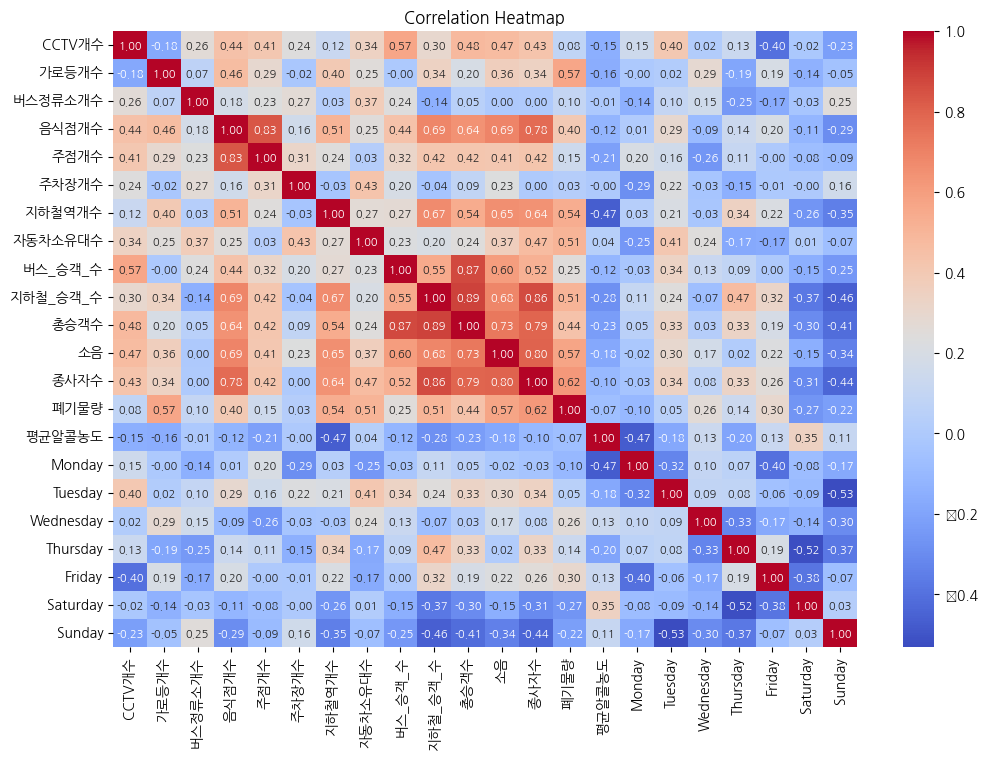

In [ ]:
ycol = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 상관관계 히트맵 시각화
print("\n상관관계 히트맵 시각화:")
correlation_heatmap(df00, xcol, ycol)

'CCTV개수', '가로등개수', '버스정류소개수', '음식점개수', '주점개수', '주차장개수', '지하철역개수',
        '자동차소유대수', '버스_승객_수', '지하철_승객_수', '총승객수', '소음', '종사자수', '폐기물량','평균알콜농도'

요일별 실행시,

월: 지하철 역 개수가 적은 곳 -0.47

화: 자동차소유대수가 높은 곳 0.41

수: 0.3이상 없음

목: 지하철승객수, 지하철역개수에 따라 증가

금: 지하철 승객수, 폐기물양 많은곳

토: 지하철 승객수, 종사자 수 적은 곳, 알콜농도가 높음

일: 음식점수와 반비례, 지하철역, 지하철 승객수, 총승객수와 반비례, 종사자수와 반비례 -> 직장근처가 아닌 곳에서 더 음주사고가 일어남



[유동인구, 직장 기준]

목금 / 토일월 극명하게 차이가 남
- 금요일 회식 잦음


In [ ]:
# 데이터 시각화: 쌍플롯
print("\n데이터 시각화: 쌍플롯")
pairplot_visualization(df00, xcol, ycol)

### 나이대별


상관관계 히트맵 시각화:


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


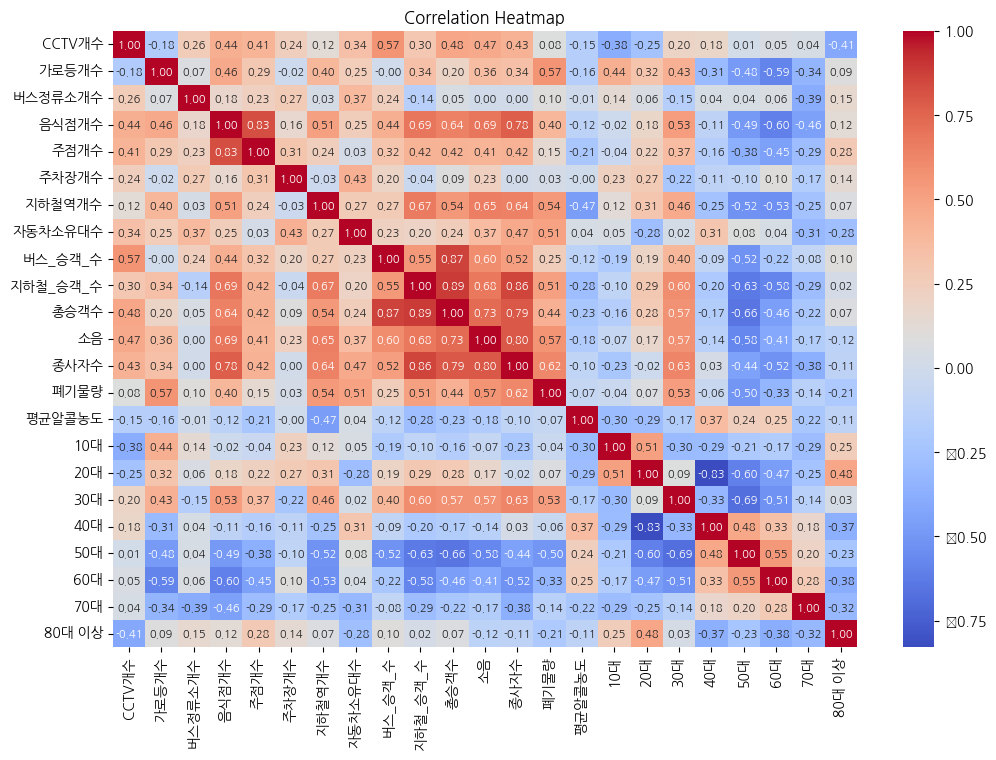

In [ ]:
ycol = [ '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대 이상']

# 상관관계 히트맵 시각화
print("\n상관관계 히트맵 시각화:")
correlation_heatmap(df00, xcol, ycol)

'CCTV개수', '가로등개수', '버스정류소개수', '음식점개수', '주점개수', '주차장개수', '지하철역개수',
        '자동차소유대수', '버스_승객_수', '지하철_승객_수', '총승객수', '소음', '종사자수', '폐기물량','평균알콜농도'
      
나이대별 실행시,

10대 : 가로등이 있는 곳에서 사고 자주? 평균 알콜농도 낮음

20대 : 지하철역, 지하처 승객수가 많은 곳 평균 알콜농도 낮음

30대 : 음식점, 주점 많은 곳의 영향 큼, 대중교통 승객수 많은 곳, 소음, 폐기물량, 종사자수 많은 곳 - 직장인, 회사 근처 술자리 영향

40대이상: 가로등  개수와 반비례, 특히 5060대는 가로등 개수가 적을수록 사고 많음

50대 이상: 음식점 수, 대중교통 이용, 종사자수와 음의 상관관계 - 30대와 반대의 결과


In [ ]:
# 데이터 시각화: 쌍플롯
print("\n데이터 시각화: 쌍플롯")
pairplot_visualization(df00, xcol, ycol)

###시간대별


상관관계 히트맵 시각화:


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


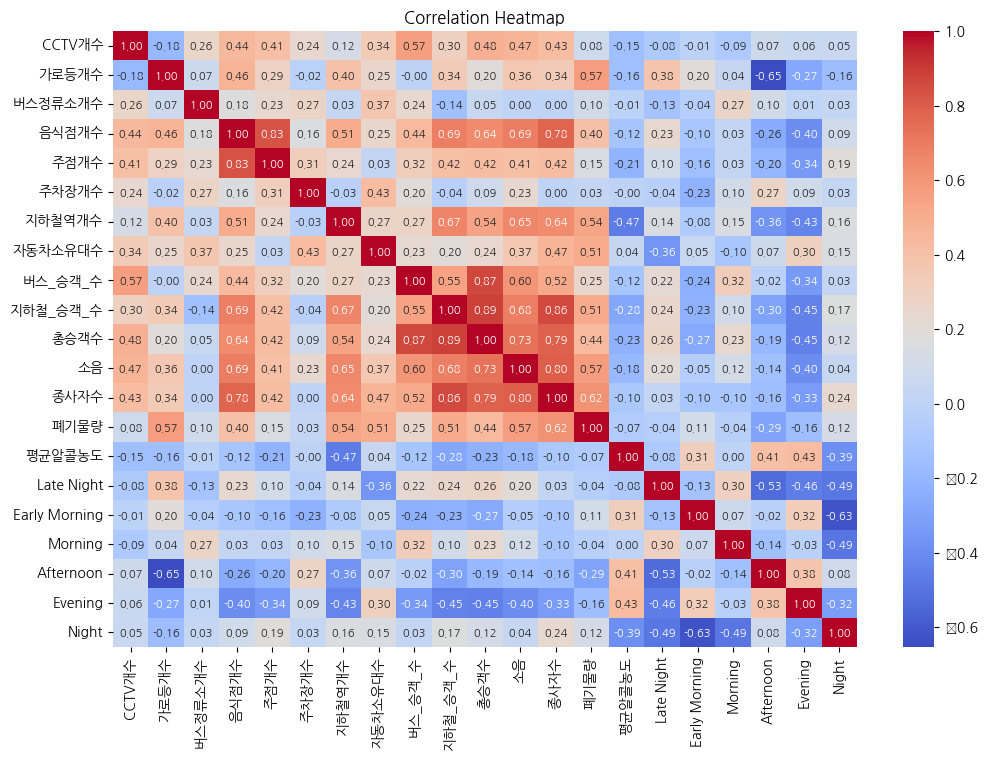

In [ ]:
ycol = ['Late Night',  'Early Morning', 'Morning','Afternoon', 'Evening', 'Night']

# 상관관계 히트맵 시각화
print("\n상관관계 히트맵 시각화:")
correlation_heatmap(df00, xcol, ycol)

'CCTV개수', '가로등개수', '버스정류소개수', '음식점개수', '주점개수', '주차장개수', '지하철역개수',
        '자동차소유대수', '버스_승객_수', '지하철_승객_수', '총승객수', '소음', '종사자수', '폐기물량','평균알콜농도'
        
        
가로등 개수 : 오후~ 밤까지 음의 영향 -> 가로등이 적은 지역에 시야 방해로 음주운전이 더 많이 일어남(새벽은 예외)

알콜 농도: 오후~ 저녁까지 가장 높음




In [ ]:
# 데이터 시각화: 쌍플롯
# 4분정도 걸림
print("\n데이터 시각화: 쌍플롯")
pairplot_visualization(df00, xcol, ycol)